In [4]:
#Monte carlo- Forecasting stock prices - Part 1

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [5]:
ticker ='MRO'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [6]:
data

,MRO
Date,
2010-01-04,15.502111
2010-01-05,15.516592
2010-01-06,15.859372
2010-01-07,15.762804
2010-01-08,15.786951
...,...
2020-10-05,4.230000
2020-10-06,4.040000
2020-10-07,4.130000


In [7]:
#easy formula for log returns

In [8]:
log_returns = np.log(1 + data.pct_change())

In [9]:
log_returns.tail()

,MRO
Date,
2020-10-05,0.026349
2020-10-06,-0.045957
2020-10-07,0.022033
2020-10-08,0.058771
2020-10-09,-0.026607


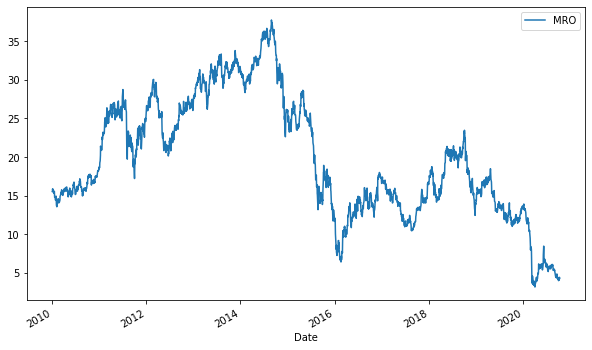

In [10]:
data.plot(figsize=(10,6))

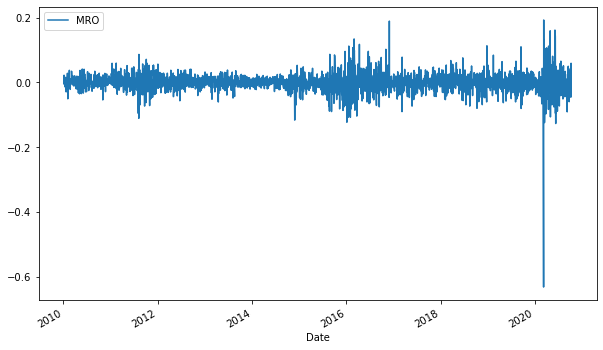

In [11]:
log_returns.plot(figsize= (10,6))

Text(0, 0.5, 'Frequency')

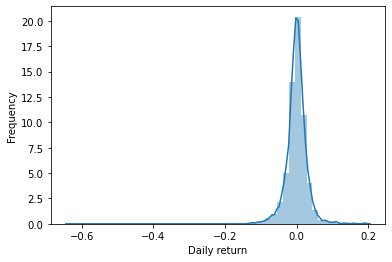

In [12]:
#plot of daily returns histogram
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily return")
plt.ylabel("Frequency")



In [13]:
u = log_returns.mean()

In [14]:
u

MRO   -0.000476
dtype: float64

In [15]:
var = log_returns.var()
var

MRO    0.000918
dtype: float64

In [16]:
#formula 
#price today = price yesterday * e^r
# r = drift+stdev* z

In [17]:
#Drift = u + 0.5(var)

In [18]:
drift = u + (0.5*var)
drift

MRO   -0.000017
dtype: float64

In [19]:
stdev = log_returns.std()
stdev

MRO    0.0303
dtype: float64

In [20]:
type(drift)

pandas.core.series.Series

In [21]:
type(stdev)

pandas.core.series.Series

In [22]:
np.array(drift)

array([-1.69853291e-05])

In [23]:
drift.values

array([-1.69853291e-05])

In [24]:
stdev.values

array([0.03030019])

In [25]:
norm.ppf(0.95)

1.6448536269514722

In [26]:
x = np.random.rand(10,2)
x

array([[0.59487971, 0.34482138],
       [0.50080061, 0.43663191],
       [0.97490833, 0.3833547 ],
       [0.60539281, 0.56311761],
       [0.29833572, 0.14208796],
       [0.35966406, 0.34557789],
       [0.5783099 , 0.29199963],
       [0.44165077, 0.2290406 ],
       [0.42566857, 0.04838153],
       [0.68516683, 0.26112082]])

In [27]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.32815549,  0.20171061],
       [-0.22398671,  0.04233749],
       [ 0.6495603 , -0.04828872],
       [-2.22958856, -2.34548529],
       [ 1.48986786, -0.05749639],
       [-0.69324336, -0.53931371],
       [-2.01632651,  1.48793369],
       [-0.63929468,  1.05311831],
       [-2.34788759, -1.84471534],
       [ 0.35990416, -0.099803  ]])

In [28]:
t_intervals = 252
iterations = 1000

In [29]:
#daily_returns = e^r
#r = drift + stdev * z
# z = norm.ppf(np.raandom.rand(t_intervals, iterations))

In [30]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.009825  , 0.98239043, 0.97184456, ..., 0.98183662, 0.99313463,
        0.98734371],
       [0.95613223, 1.0011727 , 1.00214623, ..., 0.98339417, 0.95049974,
        0.94944948],
       [1.03895817, 0.96665374, 0.99575583, ..., 1.00692865, 0.98463385,
        1.00398481],
       ...,
       [1.02613327, 0.97665003, 1.00662503, ..., 0.97548035, 1.04003153,
        0.98850745],
       [0.99260489, 0.97240892, 1.0177268 , ..., 0.96670442, 1.01613677,
        0.9822261 ],
       [1.01346921, 0.92764778, 0.93997804, ..., 1.03942718, 1.02164889,
        1.03050905]])

In [31]:
#  St(today's price) = S0(yesterday's price) * daily_returns



In [32]:
S0 = data.iloc[-1]
S0

MRO    4.265
Name: 2020-10-09 00:00:00, dtype: float64

In [33]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
price_list[0] = S0
price_list

array([[4.26499987, 4.26499987, 4.26499987, ..., 4.26499987, 4.26499987,
        4.26499987],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [36]:
price_list

array([[4.26499987, 4.26499987, 4.26499987, ..., 4.26499987, 4.26499987,
        4.26499987],
       [4.07790381, 4.27000142, 4.27415354, ..., 4.19417599, 4.05388126,
        4.04940192],
       [4.2367715 , 4.12761286, 4.25601332, ..., 4.22323595, 3.9915887 ,
        4.06553802],
       ...,
       [3.10195202, 2.63523434, 3.65172337, ..., 5.87404565, 3.97926284,
        7.43695202],
       [3.07901273, 2.56252538, 3.71645675, ..., 5.67846588, 4.04347531,
        7.3047684 ],
       [3.12048461, 2.37712099, 3.49338775, ..., 5.9023518 , 4.13101204,
        7.52762991]])

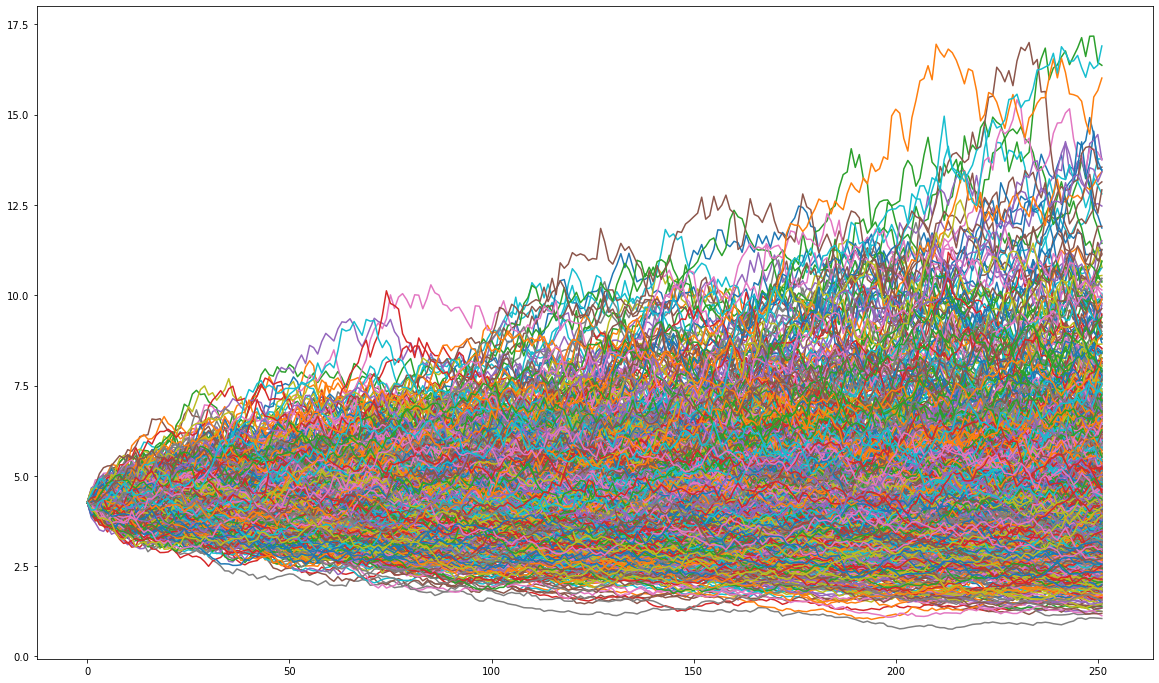

In [37]:
plt.figure(figsize=(20,12))
plt.plot(price_list)

In [38]:
expected_ending_price_point = round(np.mean(price_list),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))
    

Expected Ending Price Point :  4.5


In [39]:
population_mean = (u+1) * S0
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")


Sample Mean :  4.5
Population Mean:  MRO    4.26
dtype: float64
Percent Difference :  MRO   -5.56
dtype: float64 %


In [40]:
top_ten = np.percentile(price_list,100-10)
bottom_ten = np.percentile(price_list,10);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))

Top 10% :  6.39
Bottom 10% :  2.84


In [41]:
import matplotlib.pyplot as plt

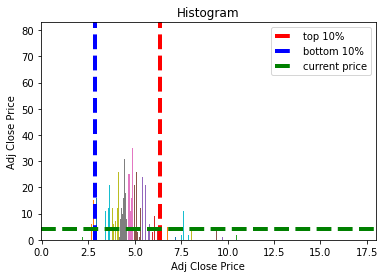

In [45]:
plt.hist(price_list,bins=100)
plt.axvline(top_ten, color='r', linestyle = 'dashed', linewidth=4)
plt.axvline(bottom_ten, color = 'blue',linestyle = 'dashed', linewidth= 4)
plt.axhline(np.array(S0),color='g', linestyle='dashed',linewidth=4)
plt.title('Histogram')
plt.xlabel('Adj Close Price')
plt.ylabel('Adj Close Price')
plt.legend(['top 10%','bottom 10%','current price'], loc='upper right')
plt.show()
